# 월별 출생아 fbporphet 1

In [ ]:
pip install fbprophet # 프로펫 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # 판다스
df = pd.read_csv('/content/전국출생아수81-20.CSV', encoding='cp949') # 데이터 로드

In [ ]:
df.head()

,시간,출생아수
0,1981년01월,88151
1,1981년02월,93556
2,1981년03월,70421
3,1981년04월,66093
4,1981년05월,68940


In [ ]:
df = df.rename(columns={'시간':'time', '출생아수':'birth'})
df.tail() # 이름 바꿔줬다

,time,birth
475,2020년08월,22402
476,2020년09월,23499
477,2020년10월,21884
478,2020년11월,20054
479,2020년12월,19641


In [ ]:
df["time"] = df["time"].str.replace(pat=r'년', repl=r'-', regex=True) # 한글 지워줬다

In [ ]:
df["time"] = df["time"].str.replace(pat=r'월', repl=r'', regex=True) # 한글 지워줬다

In [ ]:
df.head()

,time,birth
0,1981-01,88151
1,1981-02,93556
2,1981-03,70421
3,1981-04,66093
4,1981-05,68940


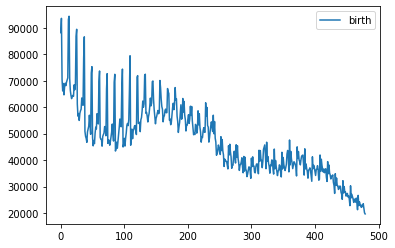

In [ ]:
from matplotlib import pyplot # 맷플롯립으로 출생아수를 그려봤다
df.plot()
pyplot.show() # 이쁘다

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds']) # 프로펫은 변수 이름을 ds, y 로 맞춰줘야 한단다

In [ ]:
from fbprophet import Prophet # 프로펫
model = Prophet() # 이제부터 너는 모델이다

In [ ]:
model.fit(df) # 학습

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_1year = list() # 마지막 년도인 2020년의 12개의 달을 모으려고 한다 
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 남에 꺼 따라했다

# 미래나 과거를 예측해보기 전 학습으로 사용한 데이터를 잘 예측하는지 확인해야 한단다
# in_sample_forecast라고 한다는데, 즉 train_set을 잘 예측하냐 보는거다

In [ ]:
forecast = model.predict(last_1year) # 모은 2020년을 예측해보라 하고 forecast에 저장했다

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()) 
# 뭐가 많은데 4가지 컬럼만 보겠다

          ds          yhat    yhat_lower    yhat_upper
0 2020-01-01  34727.082296  28941.784239  40401.340646
1 2020-02-01  32322.647717  26871.005319  38046.154614
2 2020-03-01  26443.097129  21016.747619  32297.856781
3 2020-04-01  23393.959225  18146.538592  28865.148937
4 2020-05-01  22753.552434  17682.281890  28474.235860


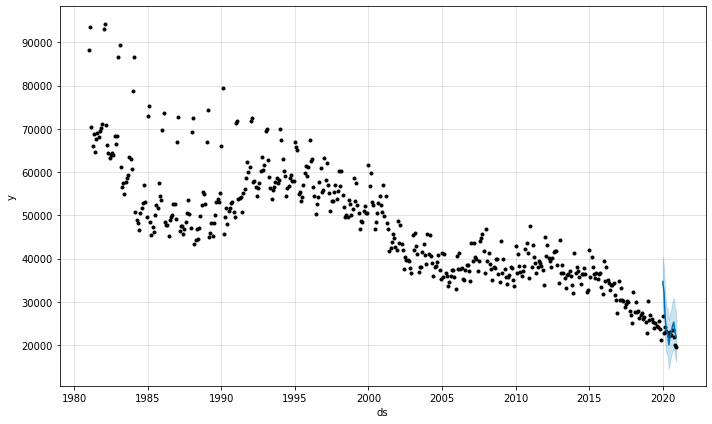

In [ ]:
model.plot(forecast)
pyplot.show()
# 프로펫은 내장함수 plot()가 있어서 좋다
# 검은점은 실제 데이터고 파란선이 예측값인데 엄청 잘 맞춘듯

In [ ]:
last_1year1 = list() # 이번엔 임의의 날짜 2021년 12달을 만든다
for i in range(1, 13):
  last_1year1.append(['2021-%02d' % i])
last_1year1 = pd.DataFrame(last_1year1, columns = ['ds'])
last_1year1['ds'] = pd.to_datetime(last_1year1['ds'])

# out_of_sample_forecast라고 한다는데, 그냥 21년 예측하는거다

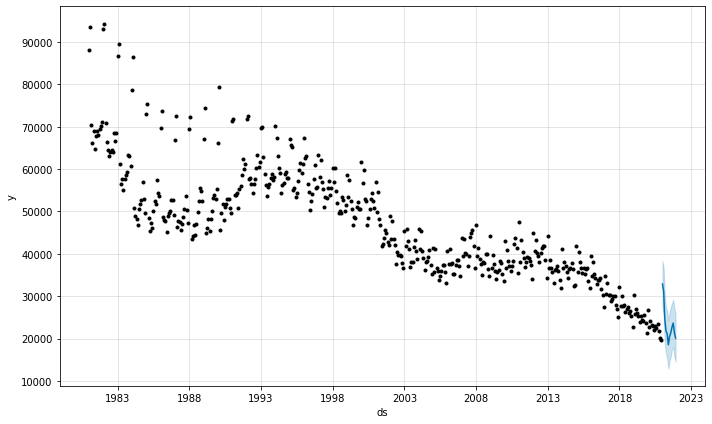

In [ ]:
forecast1 = model.predict(last_1year1)
model.plot(forecast1)
pyplot.show()
# 대충 잘 맞춘듯, 점이 많으니까 그냥 용과같아서 이쁘다

In [ ]:
# 이번에는 다르게 마지막 1년을 제외한 값으로 학습을 하고 마지막 1년을 예측한 뒤 
# 실제 마지막 1년과 비교하려고 한다 

# 마지막 12개월 제외시키기 
train = df.drop(df.index[-12:]) # train에서 뒤에 12개 제외
y_true = df['y'][-12:].values # 제외한 값은 y_true로 저장해둔다

# 모델 생성 후 학습
model = Prophet()
model.fit(train) # 12개가 빠진 train으로 학습

# 가상의 마지막 12개월 생성
last_1year = list()
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 실제 값이 들은게 아니다 !

# 예측, 비교하기 그리고 MAE를 살펴보기
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 3810.923


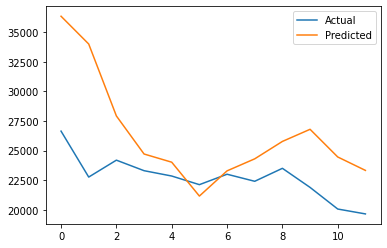

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
forecast1['yhat'] # 2021년 평균 출생아수 예측값

0     32876.902314
1     31123.177577
2     24745.606706
3     21783.181656
4     21155.716159
5     18511.883495
6     20473.715737
7     21324.138964
8     22693.445189
9     23639.242743
10    21383.904601
11    20109.910406
Name: yhat, dtype: float64

In [ ]:
data2021 = [24909, 21328, 23934, 22710, 21935, 21524, 22356, 22287, 21893, 20741, 19793, 17084]
# 실제 2021년 출생아수 값
# https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

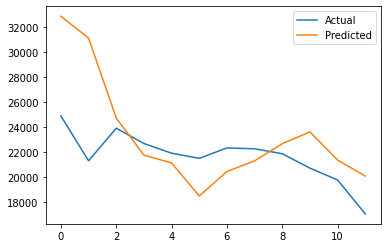

In [ ]:
pyplot.plot(data2021, label='Actual')
pyplot.plot(forecast1['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
last_1year2 = list() # 이번엔 임의의 날짜 2022년 12달을 만든다
for i in range(1, 13):
  last_1year2.append(['2022-%02d' % i])
last_1year2 = pd.DataFrame(last_1year2, columns = ['ds'])
last_1year2['ds'] = pd.to_datetime(last_1year2['ds'])

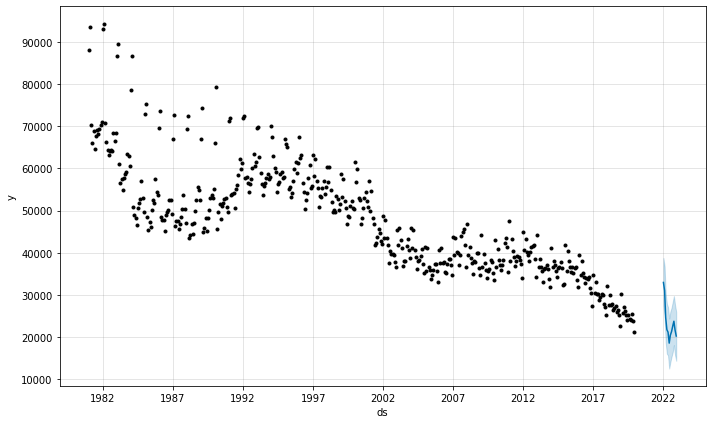

In [ ]:
forecast2 = model.predict(last_1year2)
model.plot(forecast2)
pyplot.show()

In [ ]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,24134.007831,27403.968681,38786.230067,23239.757136,24917.316374,8843.179328,8843.179328,8843.179328,8843.179328,8843.179328,8843.179328,0.0,0.0,0.0,32977.187159
1,2022-02-01,24011.459015,25117.481459,36815.664690,23067.468225,24829.938479,7041.805035,7041.805035,7041.805035,7041.805035,7041.805035,7041.805035,0.0,0.0,0.0,31053.264050
2,2022-03-01,23900.769761,18755.423484,30335.343693,22910.552639,24796.177149,753.953284,753.953284,753.953284,753.953284,753.953284,753.953284,0.0,0.0,0.0,24654.723045
3,2022-04-01,23778.220945,16067.219160,27930.882104,22714.370571,24746.499094,-1992.577139,-1992.577139,-1992.577139,-1992.577139,-1992.577139,-1992.577139,0.0,0.0,0.0,21785.643807
4,2022-05-01,23659.625317,15689.577935,27124.033194,22527.092267,24690.408575,-2458.735713,-2458.735713,-2458.735713,-2458.735713,-2458.735713,-2458.735713,0.0,0.0,0.0,21200.889604
5,2022-06-01,23537.076501,12561.265028,24424.027227,22336.020503,24616.117295,-4942.425926,-4942.425926,-4942.425926,-4942.425926,-4942.425926,-4942.425926,0.0,0.0,0.0,18594.650576
6,2022-07-01,23418.480873,14113.665378,26053.228842,22145.024098,24552.172277,-2930.826376,-2930.826376,-2930.826376,-2930.826376,-2930.826376,-2930.826376,0.0,0.0,0.0,20487.654497
7,2022-08-01,23295.932057,15387.315479,26996.806312,21929.089172,24484.390992,-1970.680212,-1970.680212,-1970.680212,-1970.680212,-1970.680212,-1970.680212,0.0,0.0,0.0,21325.251844
8,2022-09-01,23173.383241,16483.714511,28390.363072,21722.560036,24424.274551,-524.125018,-524.125018,-524.125018,-524.125018,-524.125018,-524.125018,0.0,0.0,0.0,22649.258223
9,2022-10-01,23054.787612,18134.295220,29752.625737,21547.525992,24376.505229,728.408190,728.408190,728.408190,728.408190,728.408190,728.408190,0.0,0.0,0.0,23783.195803


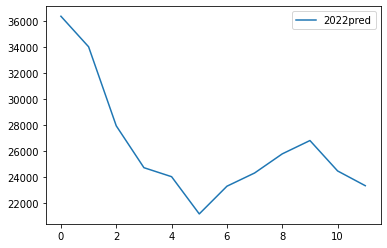

In [ ]:
pyplot.plot(forecast['yhat'], label='2022pred')
pyplot.legend()
pyplot.show()

# 2023년 예측

In [ ]:
last_1year3 = list() # 이번엔 임의의 날짜 2023년 12달을 만든다
for i in range(1, 13):
  last_1year3.append(['2023-%02d' % i])
last_1year3 = pd.DataFrame(last_1year3, columns = ['ds'])
last_1year3['ds'] = pd.to_datetime(last_1year3['ds'])

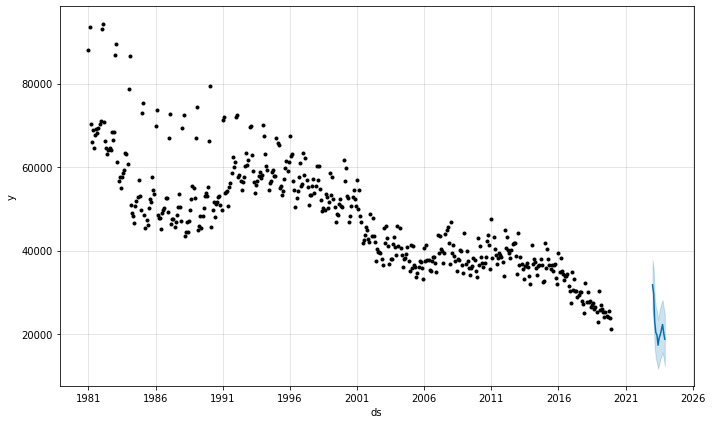

In [ ]:
forecast3 = model.predict(last_1year3)
model.plot(forecast3)
pyplot.show()

In [ ]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,22691.094352,25770.827876,37675.813524,21126.167000,24367.390443,9094.551123,9094.551123,9094.551123,9094.551123,9094.551123,9094.551123,0.0,0.0,0.0,31785.645475
1,2023-02-01,22568.545536,23656.810667,35534.299275,20932.522524,24310.901513,7083.029680,7083.029680,7083.029680,7083.029680,7083.029680,7083.029680,0.0,0.0,0.0,29651.575216
2,2023-03-01,22457.856283,16957.498548,28927.223795,20757.634676,24263.910661,559.210201,559.210201,559.210201,559.210201,559.210201,559.210201,0.0,0.0,0.0,23017.066484
3,2023-04-01,22335.307467,14203.692435,26342.899759,20565.419072,24201.975074,-2004.763647,-2004.763647,-2004.763647,-2004.763647,-2004.763647,-2004.763647,0.0,0.0,0.0,20330.543821
4,2023-05-01,22216.711839,13150.357956,25537.414261,20327.708391,24153.124943,-2418.084003,-2418.084003,-2418.084003,-2418.084003,-2418.084003,-2418.084003,0.0,0.0,0.0,19798.627836
5,2023-06-01,22094.163023,11721.285515,23384.045462,20142.098203,24105.339901,-4775.778451,-4775.778451,-4775.778451,-4775.778451,-4775.778451,-4775.778451,0.0,0.0,0.0,17318.384572
6,2023-07-01,21975.567394,12696.347143,24991.636606,19933.364480,24054.902808,-2892.266931,-2892.266931,-2892.266931,-2892.266931,-2892.266931,-2892.266931,0.0,0.0,0.0,19083.300464
7,2023-08-01,21853.018578,13908.426017,26387.992960,19733.788919,23995.439755,-2021.916231,-2021.916231,-2021.916231,-2021.916231,-2021.916231,-2021.916231,0.0,0.0,0.0,19831.102347
8,2023-09-01,21730.469762,14754.842676,27426.789344,19532.374813,23950.275796,-645.480993,-645.480993,-645.480993,-645.480993,-645.480993,-645.480993,0.0,0.0,0.0,21084.988770
9,2023-10-01,21611.874134,15620.075560,28096.247799,19319.428644,23899.207999,665.760300,665.760300,665.760300,665.760300,665.760300,665.760300,0.0,0.0,0.0,22277.634434


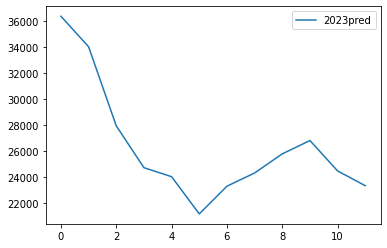

In [ ]:
pyplot.plot(forecast['yhat'], label='2023pred')
pyplot.legend()
pyplot.show()